In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, lognorm, expon, weibull_min, rayleigh, logistic, chi2, beta, cauchy, erlang, gamma, kstest

In [2]:
file_paths = ['NIFTY 50-01-04-2018-to-31-03-2019.csv', 'NIFTY 50-01-04-2019-to-31-03-2020.csv',
              'NIFTY 50-01-04-2020-to-31-03-2021.csv', 'NIFTY 50-01-04-2021-to-31-03-2022.csv',
              'NIFTY 50-01-04-2022-to-31-03-2023.csv']
dfs = [pd.read_csv(file) for file in file_paths]

combined_data = pd.concat(dfs, axis=0, ignore_index=True)
combined_data = combined_data.dropna()

print(combined_data.describe())

              Open          High           Low         Close   Shares Traded   \
count   1236.000000   1236.000000   1236.000000   1236.000000    1.236000e+03   
mean   13700.044417  13769.539563  13602.454773  13688.025121    4.265624e+08   
std     2980.336967   2986.868101   2970.088570   2980.233799    2.123237e+08   
min     7735.150000   8036.950000   7511.100000   7610.250000    3.219418e+07   
25%    11076.075000  11138.725000  10999.725000  11068.912500    2.627301e+08   
50%    12182.350000  12225.350000  12132.200000  12172.250000    3.616773e+08   
75%    16979.050000  17094.062500  16834.100000  16956.250000    5.542352e+08   
max    18871.950000  18887.600000  18778.200000  18812.500000    1.811564e+09   

       Turnover (₹ Cr)  
count      1236.000000  
mean      23532.322994  
std        8789.050986  
min        1534.080000  
25%       17344.062500  
50%       21489.590000  
75%       28729.297500  
max       78522.930000  


In [3]:
params_normal = norm.fit(combined_data['Close '])
params_lognormal = lognorm.fit(combined_data['Close '])
params_exponential = expon.fit(combined_data['Close '])
params_weibull = weibull_min.fit(combined_data['Close '], loc=0)
params_rayleigh = rayleigh.fit(combined_data['Close '])
params_logistic = logistic.fit(combined_data['Close '])
params_chi2 = chi2.fit(combined_data['Close '])
params_beta = beta.fit(combined_data['Close '])
params_cauchy = cauchy.fit(combined_data['Close '])
params_erlang = erlang.fit(combined_data['Close '], loc=0)
params_gamma = gamma.fit(combined_data['Close '])

c:\Users\Family\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_optimize.py:640: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 81.9.
  fx = function(np.copy(x), *(wrapper_args + args))
c:\Users\Family\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_optimize.py:640: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 74.1.
  fx = function(np.copy(x), *(wrapper_args + args))
c:\Users\Family\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_optimize.py:640: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 70.19999999999999.
  fx = function(np.copy(x), *(wrapper_args + args))
c:\Users\Family\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_optimize.py:640: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer

In [4]:
print("Parameters for Normal Distribution:", params_normal)
print("Parameters for Lognormal Distribution:", params_lognormal)
print("Parameters for Exponential Distribution:", params_exponential)
print("Parameters for Weibull Distribution:", params_weibull)
print("Parameters for Rayleigh Distribution:", params_rayleigh)
print("Parameters for Logistic Distribution:", params_logistic)
print("Parameters for Chi-squared Distribution:", params_chi2)
print("Parameters for Beta Distribution:", params_beta)
print("Parameters for Cauchy Distribution:", params_cauchy)
print("Parameters for Erlang Distribution:", params_erlang)
print("Parameters for Gamma Distribution:", params_gamma)

Parameters for Normal Distribution: (13688.025121359224, 2979.027959216576)
Parameters for Lognormal Distribution: (0.3646455951595106, 5212.667708369887, 7944.524174036309)
Parameters for Exponential Distribution: (7610.25, 6077.775121359224)
Parameters for Weibull Distribution: (2.223682119207203, 7537.733043667732, 6968.493873379295)
Parameters for Rayleigh Distribution: (7590.201876396702, 4798.856942470745)
Parameters for Logistic Distribution: (13549.082586917257, 1853.7468027102054)
Parameters for Chi-squared Distribution: (8.776539151489445, 7177.477606069435, 741.8097051068826)
Parameters for Beta Distribution: (1.918269303719867, 2.2626928541925038, 7594.67139033967, 12832.767254074115)
Parameters for Cauchy Distribution: (12176.52570263396, 1988.2777671238334)
Parameters for Erlang Distribution: (21.21909592755819, -0.00028408860667128655, 645.0805159612648)
Parameters for Gamma Distribution: (4.388303453721704, 7177.478850085901, 1483.613542174117)


C:\Users\Family\AppData\Local\Temp\ipykernel_8116\3581985271.py:14: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value array(21.21909593).
  p_erlang = erlang.pdf(x, *params_erlang)


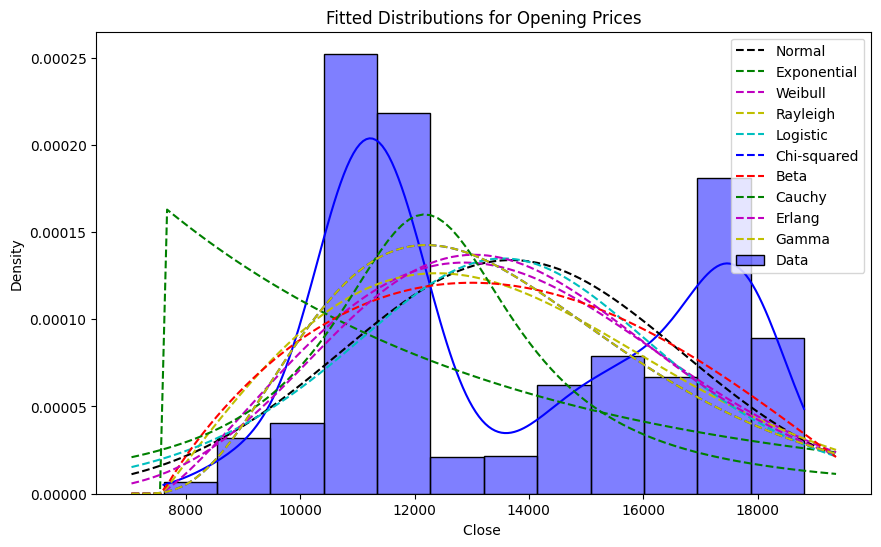

In [5]:
plt.figure(figsize=(10, 6))
sns.histplot(combined_data['Close '], kde=True, stat='density', color='blue', label='Data')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p_normal = norm.pdf(x, *params_normal)
p_exponential = expon.pdf(x, *params_exponential)
p_weibull = weibull_min.pdf(x, *params_weibull)
p_rayleigh = rayleigh.pdf(x, *params_rayleigh)
p_logistic = logistic.pdf(x, *params_logistic)
p_chi2 = chi2.pdf(x, *params_chi2)
p_beta = beta.pdf(x, *params_beta)
p_cauchy = cauchy.pdf(x, *params_cauchy)
p_erlang = erlang.pdf(x, *params_erlang)
p_gamma = gamma.pdf(x, *params_gamma)

plt.plot(x, p_normal, 'k--', label='Normal')
plt.plot(x, p_exponential, 'g--', label='Exponential')
plt.plot(x, p_weibull, 'm--', label='Weibull')
plt.plot(x, p_rayleigh, 'y--', label='Rayleigh')
plt.plot(x, p_logistic, 'c--', label='Logistic')
plt.plot(x, p_chi2, 'b--', label='Chi-squared')
plt.plot(x, p_beta, 'r--', label='Beta')
plt.plot(x, p_cauchy, 'g--', label='Cauchy')
plt.plot(x, p_erlang, 'm--', label='Erlang')
plt.plot(x, p_gamma, 'y--', label='Gamma')

plt.title('Fitted Distributions for Opening Prices')
plt.legend()
plt.show()

In [6]:
data = combined_data['Close ']

# Perform KS test for each distribution
ks_results_normal = kstest(data, 'norm', args=params_normal)
ks_results_exponential = kstest(data, 'expon', args=params_exponential)
ks_results_weibull = kstest(data, 'weibull_min', args=params_weibull)
ks_results_rayleigh = kstest(data, 'rayleigh', args=params_rayleigh)
ks_results_logistic = kstest(data, 'logistic', args=params_logistic)
ks_results_chi2 = kstest(data, 'chi2', args=params_chi2)
ks_results_beta = kstest(data, 'beta', args=params_beta)
ks_results_cauchy = kstest(data, 'cauchy', args=params_cauchy)
ks_results_gamma = kstest(data, 'gamma', args=params_gamma)

In [7]:
p_value_normal = ks_results_normal.pvalue
p_value_exponential = ks_results_exponential.pvalue
p_value_weibull = ks_results_weibull.pvalue
p_value_rayleigh = ks_results_rayleigh.pvalue
p_value_logistic = ks_results_logistic.pvalue
p_value_chi2 = ks_results_chi2.pvalue
p_value_beta = ks_results_beta.pvalue
p_value_cauchy = ks_results_cauchy.pvalue
p_value_gamma = ks_results_gamma.pvalue

print("p-value for Normal Distribution:", p_value_normal)
print("p-value for Exponential Distribution:", p_value_exponential)
print("p-value for Weibull Distribution:", p_value_weibull)
print("p-value for Rayleigh Distribution:", p_value_rayleigh)
print("p-value for Logistic Distribution:", p_value_logistic)
print("p-value for Chi-squared Distribution:", p_value_chi2)
print("p-value for Beta Distribution:", p_value_beta)
print("p-value for Cauchy Distribution:", p_value_cauchy)
print("p-value for Gamma Distribution:", p_value_gamma)

p-value for Normal Distribution: 2.2776371069265248e-42
p-value for Exponential Distribution: 7.534775476372548e-97
p-value for Weibull Distribution: 1.9522426647783222e-31
p-value for Rayleigh Distribution: 3.320337617488824e-20
p-value for Logistic Distribution: 2.1850785453529738e-35
p-value for Chi-squared Distribution: 2.1081988235960932e-23
p-value for Beta Distribution: 2.4237382886748734e-24
p-value for Cauchy Distribution: 8.262812743434708e-48
p-value for Gamma Distribution: 2.102290452186525e-23


In [8]:
aic_normal = -2 * norm.logpdf(combined_data['Close '], *params_normal).sum() + 2 * len(params_normal)
aic_exponential = -2 * expon.logpdf(combined_data['Close '], *params_exponential).sum() + 2 * len(params_exponential)
aic_weibull = -2 * weibull_min.logpdf(combined_data['Close '], *params_weibull).sum() + 2 * len(params_weibull)
aic_rayleigh = -2 * rayleigh.logpdf(combined_data['Close '], *params_rayleigh).sum() + 2 * len(params_rayleigh)
aic_logistic = -2 * logistic.logpdf(combined_data['Close '], *params_logistic).sum() + 2 * len(params_logistic)
aic_chi2 = -2 * chi2.logpdf(combined_data['Close '], *params_chi2).sum() + 2 * len(params_chi2)
aic_beta = -2 * beta.logpdf(combined_data['Close '], *params_beta).sum() + 2 * len(params_beta)
aic_cauchy = -2 * cauchy.logpdf(combined_data['Close '], *params_cauchy).sum() + 2 * len(params_cauchy)
aic_erlang = -2 * erlang.logpdf(combined_data['Close '], *params_erlang).sum() + 2 * len(params_erlang)
aic_gamma = -2 * gamma.logpdf(combined_data['Close '], *params_gamma).sum() + 2 * len(params_gamma)

print("AIC for Normal Distribution:", aic_normal)
print("AIC for Exponential Distribution:", aic_exponential)
print("AIC for Weibull Distribution:", aic_weibull)
print("AIC for Rayleigh Distribution:", aic_rayleigh)
print("AIC for Logistic Distribution:", aic_logistic)
print("AIC for Chi-squared Distribution:", aic_chi2)
print("AIC for Beta Distribution:", aic_beta)
print("AIC for Cauchy Distribution:", aic_cauchy)
print("AIC for Erlang Distribution:", aic_erlang)
print("AIC for Gamma Distribution:", aic_gamma)

AIC for Normal Distribution: 23286.01503388037
AIC for Exponential Distribution: 24013.037903735574
AIC for Weibull Distribution: 23171.636598284524
AIC for Rayleigh Distribution: 23187.177852401153
AIC for Logistic Distribution: 23427.496916021875
AIC for Chi-squared Distribution: 23193.98339339793
AIC for Beta Distribution: 23054.94790662031
AIC for Cauchy Distribution: 24056.519318772458
AIC for Erlang Distribution: 23242.476512212335
AIC for Gamma Distribution: 23193.983393269278


C:\Users\Family\AppData\Local\Temp\ipykernel_8116\3991699541.py:9: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value array(21.21909593).
  aic_erlang = -2 * erlang.logpdf(combined_data['Close '], *params_erlang).sum() + 2 * len(params_erlang)
